# step1 : Load CSV

In [1]:
import pandas as pd
df = pd.read_csv("../data/insurance_claims.csv")

# step2 : Validate data

In [2]:
df.head()

,claim_id,client_id,premium,claim_amount,status,claim_date,country
0,C001,CL001,520.5,250.0,Approved,2024-05-12,France
1,C002,CL002,300.0,0.0,Pending,2024-06-10,Germany
2,C003,CL003,0.0,1000.0,Rejected,2024-04-18,Spain
3,C004,CL004,850.0,400.0,Approved,2024-05-21,France
4,C005,CL005,450.0,150.0,Approved,2024-07-03,Italy


In [7]:
df.tail() 

,claim_id,client_id,premium,claim_amount,status,claim_date,country
10,C011,CL011,0.0,900.0,Rejected,2024-05-25,Spain
11,C012,CL012,620.0,0.0,Pending,2024-06-15,Germany
12,C013,CL013,540.0,100.0,Approved,2024-07-22,France
13,C014,CL014,800.0,200.0,Approved,2024-08-05,Italy
14,C015,CL015,250.0,400.0,Rejected,2024-09-10,Spain


In [ ]:
df.index 
#df.dtypes

RangeIndex(start=0, stop=15, step=1)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   claim_id      15 non-null     object 
 1   client_id     15 non-null     object 
 2   premium       15 non-null     float64
 3   claim_amount  15 non-null     float64
 4   status        15 non-null     object 
 5   claim_date    15 non-null     object 
 6   country       15 non-null     object 
dtypes: float64(2), object(5)
memory usage: 968.0+ bytes


In [10]:
df.describe()

,premium,claim_amount
count,15.000000,15.000000
mean,445.366667,303.333333
std,322.008012,310.222654
min,0.000000,0.000000
25%,225.000000,50.000000
50%,450.000000,250.000000
75%,685.000000,400.000000
max,1000.000000,1000.000000


In [15]:
#df.isna()
df.isna().sum()


claim_id        0
client_id       0
premium         0
claim_amount    0
status          0
claim_date      0
country         0
dtype: int64

# replace invalid 
# "raise", "coerce", or "ignore" for errors

# errors="raise" → stop execution if invalid numbers exist
# errors="ignore" → keep invalid strings as-is (won’t convert them)
# errors="coerce" → convert invalid values to NaN (the default “silent handling”)

In [28]:
# replace invalid 
# invalid -> NaN
df["premium"] = pd.to_numeric(df["premium"], errors="coerce")

In [29]:
# invalid -> NaN
df["claim_amount"] = pd.to_numeric(df["claim_amount"], errors="coerce")


In [30]:
# See which rows were broken
print("Rows with invalid premium:\n", df[df["premium"].isna()])
#print("Rows with invalid premium:\n", df[df["premium"].isnull()])

Rows with invalid premium:
 Empty DataFrame
Columns: [claim_id, client_id, premium, claim_amount, status, claim_date, country]
Index: []


In [31]:
print("Rows with invalid claim_amount:\n", df[df["claim_amount"].isna()])


Rows with invalid claim_amount:
 Empty DataFrame
Columns: [claim_id, client_id, premium, claim_amount, status, claim_date, country]
Index: []


In [32]:
# Drop invalid rows
df = df.dropna(subset=["premium", "claim_amount"])
df

,claim_id,client_id,premium,claim_amount,status,claim_date,country
0,C001,CL001,520.5,250.0,approved,2024-05-12,France
1,C002,CL002,300.0,0.0,pending,2024-06-10,Germany
3,C004,CL004,850.0,400.0,approved,2024-05-21,France
4,C005,CL005,450.0,150.0,approved,2024-07-03,Italy
5,C006,CL006,200.0,350.0,rejected,2024-08-01,Spain
6,C007,CL007,1000.0,0.0,pending,2024-08-15,Germany
8,C009,CL009,750.0,500.0,approved,2024-09-20,Italy
9,C010,CL010,400.0,300.0,approved,2024-10-02,France
11,C012,CL012,620.0,0.0,pending,2024-06-15,Germany
12,C013,CL013,540.0,100.0,approved,2024-07-22,France


In [33]:
# Make sure numbers are floats
df["premium"] = df["premium"].astype(float)
df["claim_amount"] = df["claim_amount"].astype(float)


In [34]:
# Premium must be >0, claim_amount >=0
df = df[(df["premium"] > 0) & (df["claim_amount"] >= 0)]
df

,claim_id,client_id,premium,claim_amount,status,claim_date,country
0,C001,CL001,520.5,250.0,approved,2024-05-12,France
1,C002,CL002,300.0,0.0,pending,2024-06-10,Germany
3,C004,CL004,850.0,400.0,approved,2024-05-21,France
4,C005,CL005,450.0,150.0,approved,2024-07-03,Italy
5,C006,CL006,200.0,350.0,rejected,2024-08-01,Spain
6,C007,CL007,1000.0,0.0,pending,2024-08-15,Germany
8,C009,CL009,750.0,500.0,approved,2024-09-20,Italy
9,C010,CL010,400.0,300.0,approved,2024-10-02,France
11,C012,CL012,620.0,0.0,pending,2024-06-15,Germany
12,C013,CL013,540.0,100.0,approved,2024-07-22,France


In [35]:
# Clean text
df["status"] = df["status"].str.lower().str.strip()
df["country"] = df["country"].str.title().str.strip()
df 

,claim_id,client_id,premium,claim_amount,status,claim_date,country
0,C001,CL001,520.5,250.0,approved,2024-05-12,France
1,C002,CL002,300.0,0.0,pending,2024-06-10,Germany
3,C004,CL004,850.0,400.0,approved,2024-05-21,France
4,C005,CL005,450.0,150.0,approved,2024-07-03,Italy
5,C006,CL006,200.0,350.0,rejected,2024-08-01,Spain
6,C007,CL007,1000.0,0.0,pending,2024-08-15,Germany
8,C009,CL009,750.0,500.0,approved,2024-09-20,Italy
9,C010,CL010,400.0,300.0,approved,2024-10-02,France
11,C012,CL012,620.0,0.0,pending,2024-06-15,Germany
12,C013,CL013,540.0,100.0,approved,2024-07-22,France


# step3 : Analyze profitability

In [37]:
# profit = what the client pays - what the company pays back
df["profit"] = df["premium"] - df["claim_amount"]

In [55]:
profit_summary_count = df.groupby(["country", "status"])["profit"].count()
profit_summary_count


country  status  
France   approved    4
Germany  pending     3
Italy    approved    3
Spain    rejected    2
Name: profit, dtype: int64

In [60]:
profit_summary = df.groupby(["country", "status"])["profit"].mean().reset_index()
profit_summary

,country,status,profit
0,France,approved,315.125000
1,Germany,pending,640.000000
2,Italy,approved,383.333333
3,Spain,rejected,-150.000000


In [61]:
print("Average profit per country & claim status:")
display(profit_summary)

Average profit per country & claim status:


,country,status,profit
0,France,approved,315.125000
1,Germany,pending,640.000000
2,Italy,approved,383.333333
3,Spain,rejected,-150.000000


# Step4 : Visualize


In [ ]:
# !pip install matplotlib
import matplotlib.pyplot as plt

In [66]:
#  total profit per country
profit_by_country = df.groupby("country")["profit"].sum().sort_values(ascending=False)
profit_by_country 


country
Germany    1920.0
France     1260.5
Italy      1150.0
Spain      -300.0
Name: profit, dtype: float64

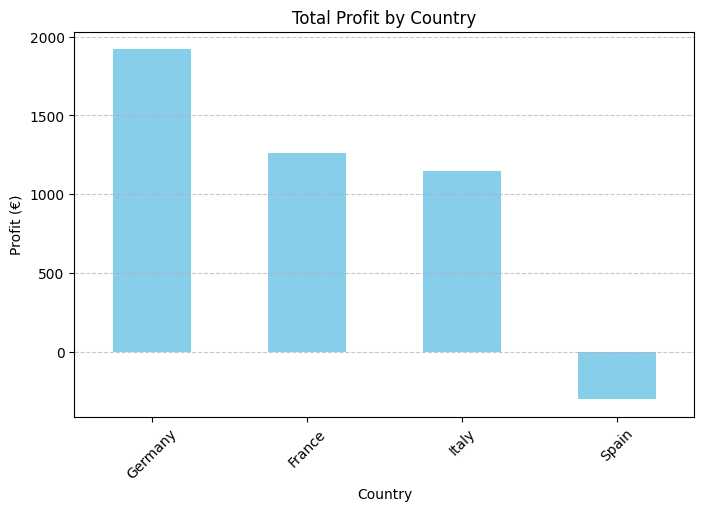

In [67]:

plt.figure(figsize=(8,5))
profit_by_country.plot(kind="bar", color="skyblue")
plt.title("Total Profit by Country")
plt.xlabel("Country")
plt.ylabel("Profit (€)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


# Step5 : Export cleaned data to new csv 

In [70]:
df.to_csv("../output/cleaned_insurance_claims.csv", index=False)